####  Enter the right directory:

In [4]:
cd /media/piotr/Archive/MHC_new/SexMatingCheck/2017-04-18_optimal_stat/MHC.1/

/media/piotr/Archive/MHC_new/SexMatingCheck/2017-04-18_optimal_stat/MHC.1


#### Check if these are the files we're looking for:

In [5]:
ls

HostGenomesFile.0.csv      NumberOfMhcInFather.csv
HostGenomesFile.3000.csv   NumberOfMhcInMother.csv
HostsGeneDivers.csv        PathoGenomesFile.0.csv
InputParameters.csv        PathoGenomesFile.3000.csv
NoMutationInPathoList.csv  PresentedPathogenNumbers.csv


In [17]:
genomeFileName = "HostGenomesFile.3000.csv"

#### And now we can plot stuff and calculate things (starting from loading the data files using genfromtxt()):

Check what is the number of pathogen species:

In [18]:
from linecache import getline
from re import split
import os
import numpy as np
import matplotlib.pyplot as plt
LabelFS = 18
TicksFS = 15
l = getline(os.getcwd() + "/InputParameters.csv", 14)
hostGeneNum = float(split(" ", getline(os.getcwd() + "/InputParameters.csv", 7))[2]) \
            * float(split(" ", getline(os.getcwd() + "/InputParameters.csv", 10))[2])
#print("No. of pathogen species =", split(" ", l)[2])
print("mutation probability in host = ", split(" ", l)[2].split()[0], "per MHC")
l = getline(os.getcwd() + "/InputParameters.csv", 15)
print("mutation probability in pathogen = ", split(" ", l)[2].split()[0], "per bit")
alpha = float(split(" ", getline(os.getcwd() + "/InputParameters.csv", 20))[2])
print("alpha factor = ", str(alpha))
pathoGen = float(split(" ", getline(os.getcwd() + "/InputParameters.csv", 12))[2])
print("number of pathogen generation per one host generation = ", str(pathoGen))
pathoSpp = float(split(" ", getline(os.getcwd() + "/InputParameters.csv", 9))[2])
print("number of pathogen species = ", str(pathoSpp))
antigenSize = int(split(" ", getline(os.getcwd() + "/InputParameters.csv", 6))[2])
print("antigen bit string size = ", str(antigenSize))
mhcSize = int(split(" ", getline(os.getcwd() + "/InputParameters.csv", 5))[2])
print("MHC bit string size = ", str(mhcSize))

mutation probability in host =  0.0001 per MHC
mutation probability in pathogen =  5e-05 per bit
alpha factor =  10.0
number of pathogen generation per one host generation =  10.0
number of pathogen species =  8.0
antigen bit string size =  6000
MHC bit string size =  16


#### Load the function for calculating the string-in-string probability (see this webpage: http://www.askamathematician.com/2010/07/q-whats-the-chance-of-getting-a-run-of-k-successes-in-n-bernoulli-trials-why-use-approximations-when-the-exact-answer-is-known/ )

In [19]:
import sys
sys.setrecursionlimit(20000)

def probOfStreak(numBits, minFits, succProb=0.5, saved=None):
    """Recursive function calculating the probability that a define K-long
    bit string will fit into a N-long random bitstring."""
    if saved is None:
        saved = {}
    ID = (numBits, minFits, succProb)
    if ID in saved:
        return saved[ID]
    else:
        if minFits > numBits or numBits <= 0:
            result = 0
        else:
            result = succProb**minFits
            for firsTrail in range(1, minFits+1):
                pr = probOfStreak(numBits-firsTrail, minFits, succProb, saved)
                result += (succProb**(firsTrail-1))*(1-succProb)*pr
        saved[ID] = result
    return result

### Plot how the number of all genes and MHC types change in time in the population:

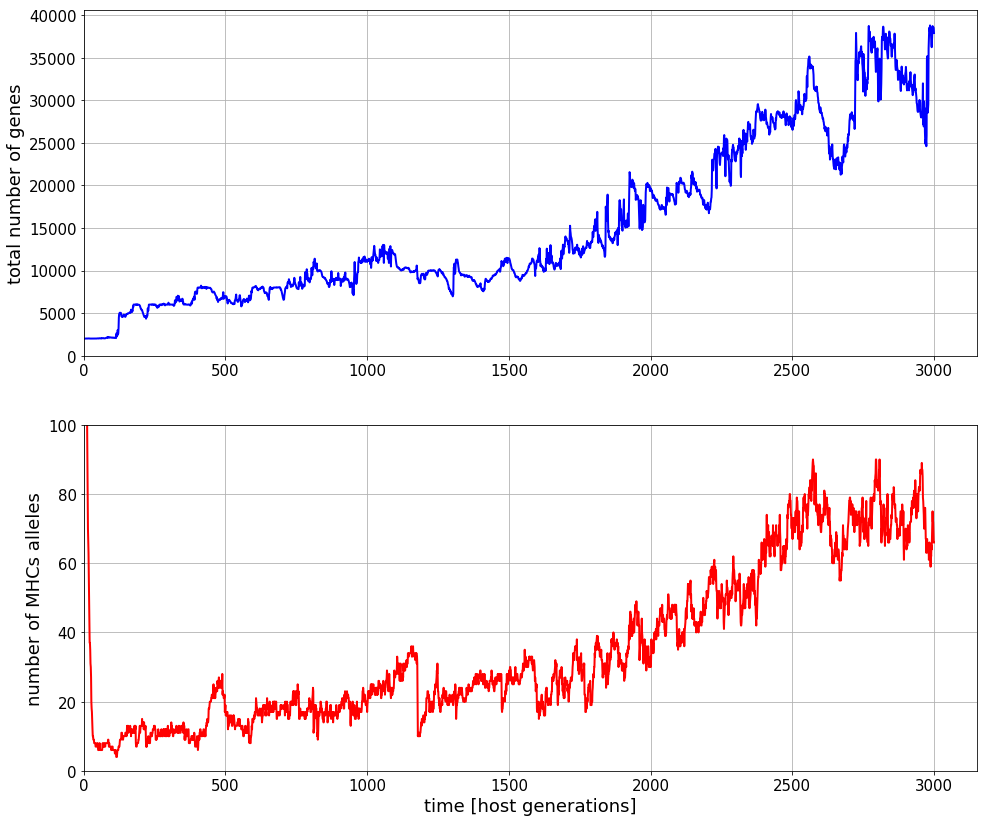

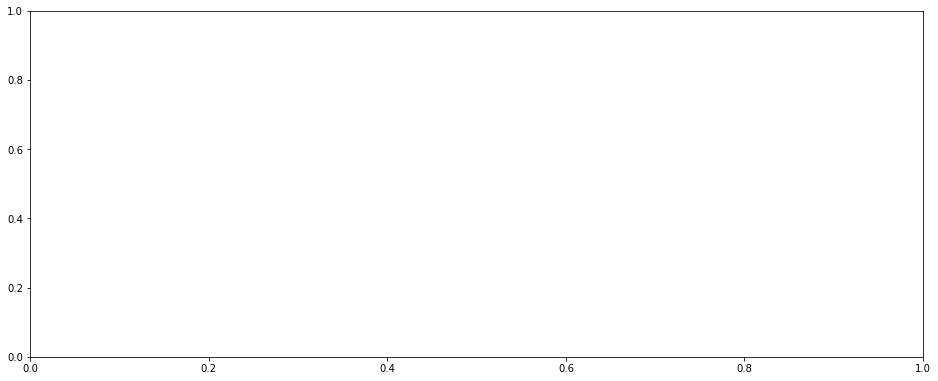

In [20]:
dd = np.genfromtxt("HostsGeneDivers.csv")
plt.figure(1, figsize=(16, 14))
plt.subplot(211)
plt.plot(dd[:,0], dd[:,2], 'b', lw=2)
plt.ylabel("total number of genes", fontsize=LabelFS)
plt.yticks(fontsize=TicksFS)
plt.xticks(fontsize=TicksFS)
plt.grid(True)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.subplot(212)
plt.plot(dd[:,0], dd[:,3], 'r', lw=2)
plt.ylabel("number of MHCs alleles", fontsize=LabelFS)
plt.xlabel("time [host generations]", fontsize=LabelFS)
plt.ylim((0, 100))
plt.xlim(xmin=0)
plt.yticks(fontsize=TicksFS)
plt.xticks(fontsize=TicksFS)
plt.grid(True)
plt.show()

### Show some stats:

In [21]:
hgsTOT = np.genfromtxt("HostGeneNumbTotal_ChrOne.csv")
MAXX = np.max(hgsTOT[-1, 1::])
print("The latest host generation:", len(hgsTOT) - 1)
print("Maximal genome size:", MAXX, "genes")

OSError: HostGeneNumbTotal_ChrOne.csv not found.

In [22]:
hgsUNIQ = np.genfromtxt("HostMHCsNumbUniq_ChrOne.csv")
MAXZ = np.max(hgsUNIQ[-1, 1::])
print("The latest host generation:", len(hgsUNIQ) - 1)
print("Maximal of unique MHC copies:", MAXZ, "genes")

OSError: HostMHCsNumbUniq_ChrOne.csv not found.

In [23]:
print("The smallest Chromosome One has:", np.min(hgsTOT[-1, 1::]), "genes.")
print("The  largest Chromosome One has:", np.max(hgsTOT[-1, 1::]), "genes.")

NameError: name 'hgsTOT' is not defined

In [24]:
print("mean number of genes per chromosome :", np.mean(hgsTOT[-1, 1::]))
print("total predicted number of genes     :", np.mean(hgsTOT[-1, 1::]) * hostGeneNum * 2.)

NameError: name 'hgsTOT' is not defined

In [25]:
pathoPresented = np.genfromtxt("PresentedPathogenNumbers.csv")
print("mean number of pathogen presentations at the end :", np.mean(pathoPresented[-1, 1::]))

mean number of pathogen presentations at the end : 16.665


### Plot the histograms of genome size and the number of MHC types in Chromosome One:

In [11]:
BinzMax = 29
bw = 1.0  # bin width
tf = 2.0  # how dence are ticks
binz = np.arange(-0.5, 1+BinzMax+0.5, bw)
xTikz = np.arange(-0.5, 1+BinzMax+0.5, tf)
LabelFS = 26
TicksFS = 20
yTikz = np.arange(0, 3501, 750)
# ===========================
plt.figure(2, figsize=(16, 14))
plt.subplot(211)
h = plt.hist(hgsUNIQ[-1, 1::], bins=binz, color="r")
#plt.xlabel("number of unique MHC alles per host's Chromosome One", fontsize=LabelFS)
plt.xlabel("liczba genów MHC na jednym chromosomie", fontsize=LabelFS)
#plt.ylabel("abundance", fontsize=LabelFS)
plt.ylabel("liczba osobników", fontsize=LabelFS)
plt.xticks(xTikz+0.5, fontsize=TicksFS)
plt.yticks(yTikz, fontsize=TicksFS)
plt.xlim(xmin=0, xmax=max(binz)+0.5)
plt.grid(True)
plt.subplot(212)
h = plt.hist(hgsTOT[-1, 1::], bins=binz)
#plt.xlabel("number of genes per host's Chromosome One", fontsize=LabelFS)
plt.xlabel("liczba wszystkich kopii genów na jednym chromosomie", fontsize=LabelFS)
#plt.ylabel("abundance", fontsize=LabelFS)
plt.ylabel("liczba osobników", fontsize=LabelFS)
plt.xticks(xTikz+0.5, fontsize=TicksFS)
plt.yticks(yTikz, fontsize=TicksFS)
plt.xlim(xmin=0, xmax=max(binz)+0.5)
plt.grid(True)
plt.savefig("MHC_size_hist.png")
plt.show()

NameError: name 'hgsUNIQ' is not defined

### Correlation between number of genes in totat in a chromosome and number of MHC alleles:

In [12]:
tt = -1
MMX = np.max([np.max(hgsTOT[tt, 1::])+1, np.max(hgsUNIQ[tt, 1::])+1])
xx = np.linspace(-0.2, MMX, 100)
plt.figure(3, figsize=(8, 8))
plt.plot(hgsTOT[-1, 1::] + np.random.rand(len(hgsTOT[-1, 1::]))*0.2 - 0.1,
         hgsUNIQ[-1, 1::] + np.random.rand(len(hgsTOT[-1, 1::]))*0.2 - 0.1, 
         "ro", ms=3)
plt.plot(xx, xx, 'k--')
plt.xlabel("number of genes per host's Chromosome One", fontsize=LabelFS-7)
plt.ylabel("number of unique MHC alles\nper host's Chromosome One", fontsize=LabelFS-7)
plt.xticks(fontsize=TicksFS)
plt.yticks(fontsize=TicksFS)
plt.axis([-0.2, MMX, -0.2, MMX])
plt.grid(True)
plt.show()

NameError: name 'hgsTOT' is not defined

### Mean number of unique MHC alleles on *one* chromosome with SD

In [13]:
meanMHCuniq = np.mean(hgsUNIQ[:, 1::], 1)
stdMHCuniq = np.std(hgsUNIQ[:, 1::], 1)
maxMHCuniq = np.max(hgsUNIQ[:, 1::], 1)
minMHCuniq = np.min(hgsUNIQ[:, 1::], 1)
timme = hgsUNIQ[:, 0]
LabelFS = 18
TicksFS = 15
plt.figure(1, figsize=(16, 14))
plt.subplot(211)
plt.plot(timme, meanMHCuniq, 'b', lw=2)
#plt.fill_between(timme, meanMHCuniq + stdMHCuniq, meanMHCuniq - stdMHCuniq, color=(0.75, 0.75, 0.9, 0.75))
plt.fill_between(timme, maxMHCuniq, minMHCuniq, color=(0.75, 0.75, 0.9, 0.75))
#plt.xlabel("time [host generations]", fontsize=LabelFS)
plt.ylabel("average number of\nunique MHC in indvidual", fontsize=LabelFS)
plt.yticks(fontsize=TicksFS)
plt.xticks(fontsize=TicksFS)
plt.grid(True)
plt.ylim((0, 10))
plt.xlim(xmin=0)
plt.subplot(212)
plt.plot(dd[:,0], dd[:,3], 'r', lw=2)
plt.ylabel("number of MHCs alleles", fontsize=LabelFS)
plt.xlabel("time [host generations]", fontsize=LabelFS)
plt.ylim((0, 70))
plt.xlim(xmin=0)
plt.yticks(fontsize=TicksFS)
plt.xticks(fontsize=TicksFS)
plt.grid(True)
plt.savefig("mhc_genes_in_pop.png")
plt.show()

NameError: name 'hgsUNIQ' is not defined

### Mean number of pathogen presentations with SD

The plot presents the fraction of possible infection events that were evaded. The total number of possible infections is the number of pathogen species per one host generation times the number of pathogen species

In [14]:
meanPatho = np.mean(pathoPresented[:, 1::], 1) # / (pathoGen * pathoSpp)
stdPathog = np.std(pathoPresented[:, 1::], 1)  # / (pathoGen * pathoSpp)
maxPathog = np.max(pathoPresented[:, 1::], 1)
minPathog = np.min(pathoPresented[:, 1::], 1)
timme = pathoPresented[:, 0]
LabelFS = 18
TicksFS = 15
plt.figure(4, figsize=(16, 7))
plt.plot(timme, meanPatho, 'b', lw=2)
#plt.fill_between(timme, meanPatho + stdPathog, meanPatho - stdPathog, color=(0.75, 0.75, 0.9, 0.75))
plt.fill_between(timme, maxPathog, minPathog, color=(0.75, 0.75, 0.9, 0.75))
#plt.hlines(probOfStreak(antigenSize, mhcSize), np.min(timme), np.max(timme), colors='r', linestyles='dashed', lw=2)
#plt.plot(timme, meanMHCuniq * probOfStreak(antigenSize, mhcSize), 'r--', lw=3)
plt.xlabel("time [host generations]", fontsize=LabelFS)
plt.ylabel("number of presented pathogens", fontsize=LabelFS)
plt.yticks(fontsize=TicksFS)
plt.xticks(fontsize=TicksFS)
plt.grid(True)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

NameError: name 'pathoPresented' is not defined

In [15]:
sys.path.append("/home/piotr/Documents/Projects/mhcEvolution/PyScripts")
import infection_vs_MHC_stats as ims
from scipy.stats import linregress

In [16]:
len(meanPatho[1000::])

NameError: name 'meanPatho' is not defined